## Nikolaos Papadopoulos

#### Course: Numerical Optimization and Large Scale Linear Algebra

#### 2nd assignment: SVD Classification

In this assignment we were tasked with creating an algorithm that classifies handwritten digits based on the Singular Value Decomposition(SVD).

In [1]:
#Imports
import os
import numpy as np
import random
import time
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
from numpy.linalg import svd, norm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#Setting my directory
# os.chdir('.\\NumericalOptimization\\Assignment 2')

In [3]:
#Checking sheet_names
pd.ExcelFile(r'data.xlsx').sheet_names

['dtest', 'azip', 'dzip', 'testzip']

In [4]:
#Reading the data in DataFrames & Transforming DataFrames into NumPy arrays/Y needed extra flattening
x_train = pd.read_excel (r'data.xlsx', sheet_name='azip',header=None).to_numpy()
y_train = pd.read_excel (r'data.xlsx', sheet_name='dzip',header=None).to_numpy()[0]
x_test = pd.read_excel (r'data.xlsx', sheet_name='testzip',header=None).to_numpy()
y_test = pd.read_excel (r'data.xlsx', sheet_name='dtest',header=None).to_numpy()

In [5]:
#Creating a function to display the images in black and white
def display_image(image):
    #Reshaping image to desired dimensions
    image = image.reshape((16,16))
    #Plotting in grayscale
    plt.imshow(image , cmap = 'gray');

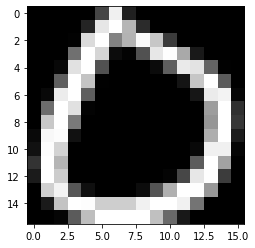

In [6]:
#Testing
display_image(x_train[:,8])

In [7]:
#Getting indexes of digits/Grouping digits together
indexes = []
[indexes.append(np.where(y_train == i)[0]) for i in range(0,10)];

In [8]:
#Initializing SVD Matrices
ud,sd,vd=[],[],[]
#Running 10 SVDs(One for each digit/With digits properly grouped from above)
for i in range(0,10):
    u,s,v= svd(x_train.T[indexes[i]].T)
    ud.append(u)
    sd.append(s)
    #V matrix is not required so no need to store it.

#### Classification - Least Squares

I will now be formulating the Residual Calculator Algorithm while at the same time creating a loop that will go through different numbers of basis vectors(From 5 to 21 as asked in the exercise).Afterwards,I will be printing the accuracy and storing the number of the best estimator/model.

In [9]:
#Tuning the algorithm for accuracy
#Initializing Identity Matrix which will  be used later on.
I = np.eye(256,256)
digit_accuracy_score = []
#Testing for 5 to 21 basis vectors
for n in range(5,21):
    #Initializing predictions
    predictions=[]
    #For every test data
    for j in range(x_test.shape[1]):
        residual = []
        #For every digit
        for i in range(0,10):
            #U for that digit
            u = ud[i][:,:n]
            uuT=np.dot(u,u.T)
            z = x_test.T[j]
            #Calculating residual for each digit
            residual.append(norm(np.dot(I-uuT, z))/norm(z))
        #Adding the residual in a list so as to have every digit residual in one list
        predictions.append(np.argmin(residual))
    #Checking accuracy
    acc=accuracy_score(y_test.T, predictions)
    #Storing all accuracy scores
    digit_accuracy_score.append(acc)
    print('Accuracy = ',acc,'for k =',n,'basis vectors')

Accuracy =  0.9028400597907325 for k = 5 basis vectors
Accuracy =  0.9053313403089188 for k = 6 basis vectors
Accuracy =  0.916791230692576 for k = 7 basis vectors
Accuracy =  0.9202790234180369 for k = 8 basis vectors
Accuracy =  0.9262580966616841 for k = 9 basis vectors
Accuracy =  0.931738913801694 for k = 10 basis vectors
Accuracy =  0.9322371699053313 for k = 11 basis vectors
Accuracy =  0.9357249626307922 for k = 12 basis vectors
Accuracy =  0.9362232187344295 for k = 13 basis vectors
Accuracy =  0.9392127553562531 for k = 14 basis vectors
Accuracy =  0.9412057797708022 for k = 15 basis vectors
Accuracy =  0.9387144992526159 for k = 16 basis vectors
Accuracy =  0.9392127553562531 for k = 17 basis vectors
Accuracy =  0.9417040358744395 for k = 18 basis vectors
Accuracy =  0.9407075236671649 for k = 19 basis vectors
Accuracy =  0.9397110114598903 for k = 20 basis vectors


In [10]:
print('best accuracy is',np.max(digit_accuracy_score),'for k =',np.argmax(digit_accuracy_score)+5)

best accuracy is 0.9417040358744395 for k = 18


In [11]:
#Storing best n(Number of basis vectors)
bestn = np.argmax(digit_accuracy_score)+5

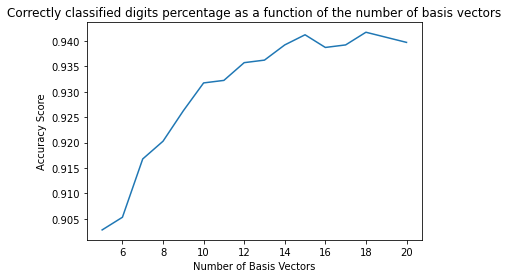

In [12]:
#N1 is used to help me plot the graph
n1 = np.arange(5,21)
plt.title('Correctly classified digits percentage as a function of the number of basis vectors')
plt.xlabel('Number of Basis Vectors')
plt.ylabel('Accuracy Score')
plt.plot(n1,digit_accuracy_score);

In [13]:
predictions=[]
for j in range(x_test.shape[1]):
    residual = []
    for i in range(0,10):
        u = ud[i][:,:18]
        uuT=np.dot(u,u.T)
        z = x_test.T[j]
        residual.append(norm(np.dot(I-uuT, z))/norm(z))
    predictions.append(np.argmin(residual))
acc=accuracy_score(y_test.T, predictions)
print('Accuracy = ',acc,'for k =',n,'basis vectors')

Accuracy =  0.9417040358744395 for k = 20 basis vectors


In [14]:
print(confusion_matrix(y_test.T,predictions))

[[355   0   2   0   1   0   0   0   0   1]
 [  0 259   0   0   3   0   2   0   0   0]
 [  8   1 178   2   5   0   0   1   3   0]
 [  2   0   3 150   1   6   0   1   2   1]
 [  2   1   0   0 185   2   0   3   0   7]
 [  7   1   1   5   0 141   0   0   2   3]
 [  2   1   0   0   2   1 163   0   1   0]
 [  0   1   1   0   3   0   0 141   0   1]
 [  2   0   1   6   0   1   0   0 153   3]
 [  0   2   0   1   4   0   0   3   2 165]]


In [15]:
print(classification_report(y_test.T,predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       359
           1       0.97      0.98      0.98       264
           2       0.96      0.90      0.93       198
           3       0.91      0.90      0.91       166
           4       0.91      0.93      0.92       200
           5       0.93      0.88      0.91       160
           6       0.99      0.96      0.97       170
           7       0.95      0.96      0.95       147
           8       0.94      0.92      0.93       166
           9       0.91      0.93      0.92       177

    accuracy                           0.94      2007
   macro avg       0.94      0.94      0.94      2007
weighted avg       0.94      0.94      0.94      2007



We see that not all digits are equally easy to classify.Our highest scoring digit is that of 1 and our lowest scoring digit is number 3 and 5(Both have the lowest f1-score)

Looking at some of the difficult ones, and seeing that in many cases they are very badly written.

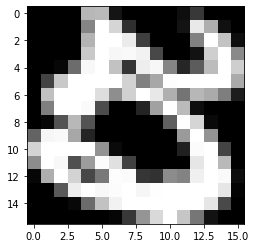

Wrongly predicted:  0


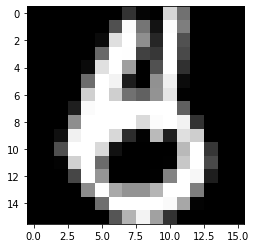

Wrongly predicted:  8


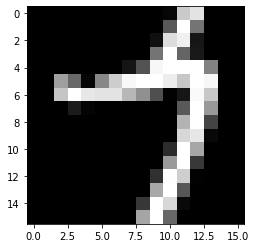

Wrongly predicted:  9


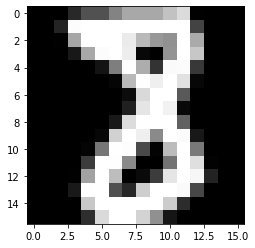

Wrongly predicted:  3


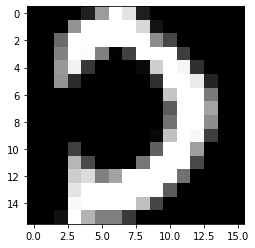

Wrongly predicted:  2


In [16]:
#Checking 5 random wrongly classified digits
mistakes = y_test.T!=np.array(predictions).reshape(2007,1)

#Setting up my seed for reproducibility
random.seed(0)
rand = random.choices(np.where(mistakes==True)[0], k=5)

#Plotting the randomly chosen
for i in range(len(rand)):
    plt.imshow(x_test[:,rand[i]].reshape((16,16)),cmap='gray');
    plt.show()
    print("Wrongly predicted: ", predictions[rand[i]])

We see that many of the digits that were wrongly classified were very badly written and some of them would have been as
difficult to classify even by human annotators hence our model underperforming for these specific images is not without reason.

In [17]:
#Checking the 10 first singular values for each Digit/Class
[print('For Digit',i,np.round(sd[i][:10])) for i in range(0,10)];

For Digit 0 [184.  98.  62.  54.  41.  40.  36.  30.  29.  25.]
For Digit 1 [234.  42.  25.  16.  14.  13.  11.  11.   8.   8.]
For Digit 2 [138.  57.  46.  41.  38.  34.  32.  28.  27.  27.]
For Digit 3 [127.  40.  33.  30.  28.  25.  24.  21.  19.  19.]
For Digit 4 [123.  42.  35.  32.  27.  25.  22.  20.  20.  18.]
For Digit 5 [94. 38. 36. 28. 24. 22. 21. 20. 17. 17.]
For Digit 6 [142.  52.  38.  32.  26.  25.  21.  21.  19.  19.]
For Digit 7 [160.  47.  37.  35.  31.  22.  20.  19.  18.  17.]
For Digit 8 [133.  42.  34.  30.  29.  25.  23.  22.  21.  19.]
For Digit 9 [141.  46.  30.  29.  23.  21.  19.  17.  15.  15.]


We see that for digit 1 and 6 our singular values are way higher than the rest so we can maybe reduce the number of basis
vectors for these 2 classes and see if it pays off since most of the information is stored on the first few basis vectors.

We also see that the first singular value is way bigger compared to the second singular value of the above chosen digits.

In [18]:
#Testing for # of basis vectors for the above 2 classes
for n in [1,3,5,7,9]:
    digit_accuracy_score = []
    predictions=[]
    for j in range(x_test.shape[1]):
        residual = []
        for i in range(0,10):
            #If its class 1 or 6 use the reduced number
            if i == 1 or i == 6:
                y = n
            else:
                #Use the one that was obtained when tuning the hyperparameters
                y = 18
            u = ud[i][:,:y]
            uuT=np.dot(u,u.T)
            z = x_test.T[j]
            residual.append(norm(np.dot(I-uuT, z))/norm(z))
        predictions.append(np.argmin(residual))
    acc=accuracy_score(y_test.T, predictions)
    digit_accuracy_score.append(acc)
    print(round(acc*100,3),'% accuracy for k =',n ,'basis vectors')

86.198 % accuracy for k = 1 basis vectors
90.135 % accuracy for k = 3 basis vectors
91.779 % accuracy for k = 5 basis vectors
92.875 % accuracy for k = 7 basis vectors
93.722 % accuracy for k = 9 basis vectors


We see that for half basis vectors for the digit class 1 and 6 we get a score real close to our original score of 18 basis vectors.Hence,it is to the best of our interest to use a lower number of basis vectors in the classification of the above digits if we want to skip computations.(It pays off to use fewer basis vectors in these 2 classes)

#### TWO-STAGE ALGORITHM WITH SVD

We are now going to implement a two-stage algorithm so as to check whether its efficient to use one basis vector when calculating the residuals given a certain threshold.I will be experimenting with various thresholds starting from 0.05(low) to 0.3(high) meaning that if the difference between the calculated residual using one vector and the calculated residual using 18 basis vectors is lower than that of our threshold,then we deem that using one basis vector is acceptable.

In [19]:
for tolerance in[0.05,0.1,0.2,0.3]:
    digit_accuracy_score = []
    predictions=[]
    unecessary_counter=0
    for j in range(x_test.shape[1]):
        residual = []
        for i in range(0,10):
            #In the first stage compare the unknown digit only to the first singular vector in each class.
            u = ud[i][:,:1]
            uuT=np.dot(u,u.T)
            z = x_test.T[j]
            residual.append(norm(np.dot(I-uuT, z))/norm(z))
        #If for one class the residual is significantly smaller than for the others, classify as that class.
        if sorted(residual)[1] - min(residual) > tolerance:
            predictions.append(np.argmin(residual))
            #How frequently is the second stage skipped
            unecessary_counter+=1
        else:
            #Otherwise perform the algorithm above
            residual = []
            for i in range(0,10):
                u = ud[i][:,:18]
                uuT=np.dot(u,u.T)
                residual.append(norm(np.dot(I-uuT, z))/norm(z))
            predictions.append(np.argmin(residual))
    acc=accuracy_score(y_test.T, predictions)
    digit_accuracy_score.append(acc)
    print('Accuracy',round(digit_accuracy_score[0],3)*100,'% for residual torelance',tolerance,'and the second stage was unecessary',round((unecessary_counter/x_test.shape[1])*100,2),'% of the time')

Accuracy 91.3 % for residual torelance 0.05 and the second stage was unecessary 71.45 % of the time
Accuracy 93.89999999999999 % for residual torelance 0.1 and the second stage was unecessary 51.32 % of the time
Accuracy 94.19999999999999 % for residual torelance 0.2 and the second stage was unecessary 23.72 % of the time
Accuracy 94.19999999999999 % for residual torelance 0.3 and the second stage was unecessary 12.95 % of the time


We see that for a low tolerance of 0.1 the algorithm accuracy is almost the same as before but we have skipped the second phase more than 50% of the time(51.32% to be precise).That means that we get almost the same score even though the algorithm has saved a lot of computing power that may prove to be very important in the long run.
Hence,it is possible to get as good results as the starting algorithm with this variant(With little trade-off)